In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('merged_clean_h4a.csv')

In [3]:
data.head(1)

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,Male,801.0,392,520.0,7,21975.0,6,16,430.0,466,28.0,1,1901,C2,100.0


In [4]:
#new tools
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#we will be predicting Target_D : y = Target_D
#X will be everything else -but we migth drop / process some columns
y=data['target_d']
X=data.drop(['target_d'],axis=1)

# drop any unusable features
- based on the correlation matrix - ie highly correlated
- anything that seems not useful

In [6]:
X.columns

Index(['controln', 'state', 'gender', 'medianhv', 'ic1', 'ic4', 'hvp1',
       'percapita', 'pobc1', 'pobc2', 'ic2', 'ic3', 'avggift', 'tcode', 'dob',
       'domain'],
      dtype='object')

In [7]:
X=X.drop(['controln', 'ic2', 'ic3', 'ic4', 'tcode'],axis=1)

# Pre processing - getting X ready for the model
- power transformation - scaling a feature
- managing outliers - remove outliers, flag them
- making strings into a number (encoding) _REQUIRED for linear regresion
- numerical scaling - scales all the features to have the same range

In [8]:
#separete the numerical and categorical features

X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)

#can turn warnings off
- import warnings
- warnings.filtewarnings('ignore')

In [9]:
X_num.head(1)

,medianhv,ic1,hvp1,percapita,pobc1,pobc2,avggift,dob
0,801.0,392,7,21975.0,6,16,28.0,1901


In [10]:
X_cat.head(1)

,state,gender,domain
0,FL,Male,C2


## turn categories into numbers - enconding

In [11]:
#One hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_encoded=encoder.transform(X_cat).toarray()
X_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_encoded.shape

(3993, 65)

In [13]:
X_cat

,state,gender,domain
0,FL,Male,C2
1,IL,Male,T2
2,FL,Female,C2
3,NC,Male,T2
4,FL,Female,C2
...,...,...,...
3988,MI,Female,0
3989,FL,Male,T2
3990,CA,Female,U1
3991,CA,Male,S1


In [14]:
#get dummies
X_dummies=pd.get_dummies(X_cat, drop_first=True)
X_dummies

,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_FL,...,domain_S1,domain_S2,domain_S3,domain_T1,domain_T2,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3989,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3990,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3991,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
X_dummies.shape

(3993, 65)

In [16]:
X_cat.head(3)

,state,gender,domain
0,FL,Male,C2
1,IL,Male,T2
2,FL,Female,C2


In [17]:
#Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()
oe.fit(X_cat)
X_ordinal=oe.transform(X_cat)
X_ordinal
#mirando la tabla de arriba es el valor numerico q le da a cada valor en letra

array([[10.,  1.,  2.],
       [16.,  1., 11.],
       [10.,  0.,  2.],
       ...,
       [ 7.,  0., 13.],
       [ 7.,  1.,  7.],
       [22.,  1.,  5.]])

## numerical fields processing

<AxesSubplot:>

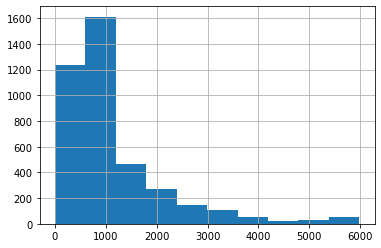

In [18]:
#removing outliers
data['medianhv'].hist()

<AxesSubplot:>

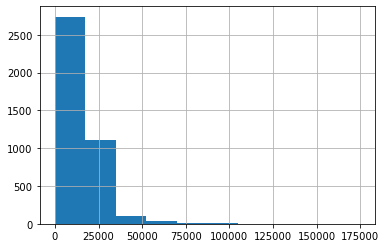

In [19]:
data['percapita'].hist()

<AxesSubplot:>

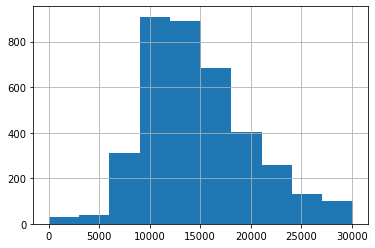

In [20]:
iqr=np.percentile(data['percapita'],75)-np.percentile(data['percapita'],25)
upper_limit=np.percentile(data['percapita'],75)+1.5*iqr
lower_limit=np.percentile(data['percapita'],25)-1.5*iqr

#example only - i will use a new df variable
data_exc_out=data[(data['percapita']>lower_limit)&(data['percapita']<upper_limit)]
data_exc_out['percapita'].hist()

<AxesSubplot:>

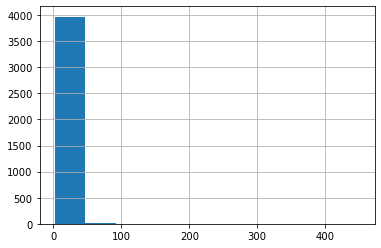

In [21]:
#power transformation - log transformation
data['avggift'].hist()

In [22]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0
data['avg_gift_log']=list(map(log_transform_clean,data['avggift']))


<AxesSubplot:>

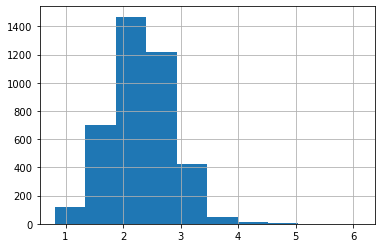

In [23]:
data['avg_gift_log'].hist()

In [24]:
X_num.head()

,medianhv,ic1,hvp1,percapita,pobc1,pobc2,avggift,dob
0,801.0,392,7,21975.0,6,16,28.000000,1901
1,537.0,365,0,19387.0,1,89,5.666667,0
2,725.0,301,3,18837.0,11,17,4.111111,2501
3,801.0,401,7,14014.0,1,74,27.277778,2208
4,995.0,252,0,17991.0,5,6,6.000000,0


## check columns

In [25]:
X_num.shape

(3993, 8)

In [26]:
X_cat.shape

(3993, 3)

## Bring the data frame back together

In [27]:
X_final=pd.concat((X_num,X_dummies),axis=1)

In [28]:
X_final.shape

(3993, 73)

# Train and test split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3, random_state=40)

# Apply the model

In [109]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

# Make predictions using the model

In [110]:
preds=lm.predict(X_test)
preds

array([16.93476687, 18.70265668, 16.4559557 , ...,  6.19599294,
        7.21649417, 13.43434895])

# Evaluate the model -r2, mse

In [114]:
r2_score(y_test,preds) #how good is that line (Regression line)

-0.5428199893295702

In [116]:
mean_squared_error(y_test,preds)

285.1134229397996

In [ ]:
#conclusion - this is a baseline

#Scaling numerical columns - apply to X_num
- MinMaxScaler
- Normalizer
- Robust Scaler(outliers)
- Standard Scaler


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #optionally range 1-10
scaled=scaler.fit(X_num)
scaled_X_num=scaled.transform(X_num)
scaled_X_num

array([[0.13390171, 0.26133333, 0.07070707, ..., 0.16161616, 0.05748689,
        0.20418904],
       [0.08976931, 0.24333333, 0.        , ..., 0.8989899 , 0.00760666,
        0.        ],
       [0.12119692, 0.20066667, 0.03030303, ..., 0.17171717, 0.00413241,
        0.26863588],
       ...,
       [0.45252424, 0.338     , 0.80808081, ..., 0.54545455, 0.02201455,
        0.42975295],
       [0.44567034, 0.35666667, 0.63636364, ..., 0.45454545, 0.02249628,
        0.47271751],
       [0.07422267, 0.15      , 0.03030303, ..., 0.86868687, 0.03323808,
        0.04350161]])